# Results

In [40]:
import json
import os
results_path = os.path.join('..','data')
results_folders = []

for root, dirs, files in os.walk(results_path):
    if root == results_path:
        results_folders = dirs
        break

data = {}
for folder in results_folders:
    data[folder] = {}
    for root, dirs, files in os.walk(os.path.join(results_path,folder)):
        for file in files:
            if file == 'final_report.json':
                with open(os.path.join(root,file)) as f:
                    data[folder][os.path.basename(root)] = json.load(f)
                    


models = [ results['model'] for report, questions in data.items() for question, results in questions.items() ]
models = list(set(models))
questions = [ question for report, questions in data.items() for question, results in questions.items() ]
questions = sorted(list(set(questions)), key=lambda x: x.lower())




##  Overview
### Did the solution pass the tests?

Text(0.5, 1.0, 'Number of tests passed by model')

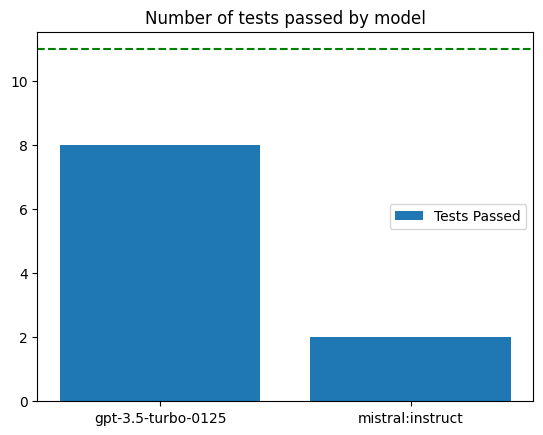

In [41]:
from matplotlib import pyplot as plt

tests_passed_x = models
tests_passed_y = []

for model in models:
    passed = 0
    for report, questions in data.items():
        for question, results in questions.items():
            if results['model'] == model:
                passed += results['passed']
    tests_passed_y.append(passed)

plt.bar(tests_passed_x, tests_passed_y)
plt.legend(['Tests Passed'])
total_tests = 11
plt.axhline(y=total_tests, color='g', linestyle='--')
plt.title('Number of tests passed by model')

### How many retries were there?

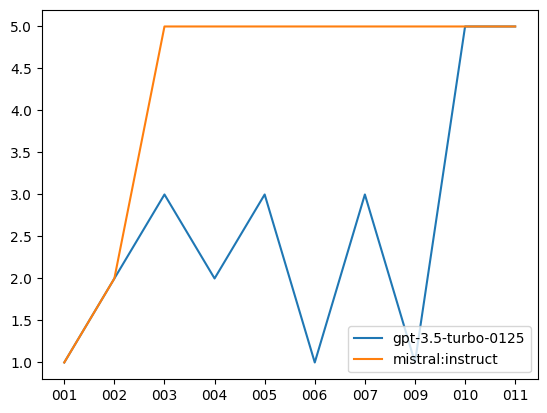

In [42]:
import matplotlib.pyplot as plt
sorted_questions = sorted(questions)
for model in models:
    total_retries_x = [question_name.split('_')[1] for question_name in sorted_questions]
    total_retries_y = []

    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    total_retries_y.append(results['total_retries'])
                    break
  
    plt.plot(total_retries_x, total_retries_y, label=model)
    plt.legend()




## Response




### Was is extracted correctly?


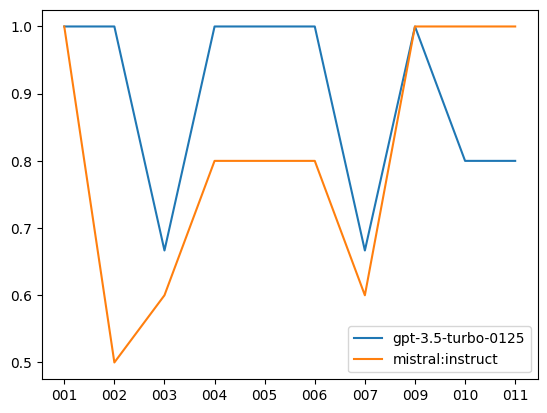

In [43]:
sorted_questions = sorted(questions)
total_extracted_x = [question_name.split('_')[1] for question_name in sorted_questions]
total_extracted_y = []

for model in models:
    total_extracted_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extracted_success_rate = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['is_extracted']:
                            extracted_success_rate += 1
                    total_extracted_y.append(extracted_success_rate/len(results['tries']))
                    break

    plt.plot(total_extracted_x, total_extracted_y, label=model)
    plt.legend()




### How many blocks of code were there?


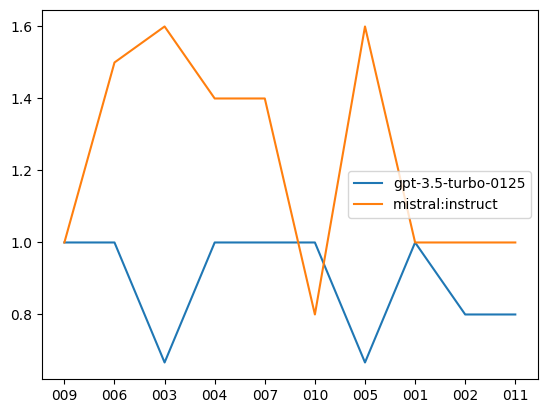

In [44]:
sorted_questions = sorted(questions)

total_code_blocks_x = [question_name.split('_')[1] for question_name in questions.keys()]
total_code_blocks_y = []

for model in models:
    total_code_blocks_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    total_code_blocks = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['number_of_code_blocks']:
                            total_code_blocks += results['tries'][retry]['number_of_code_blocks']
                            
                    total_code_blocks_y.append(total_code_blocks/len(results['tries']))
                    
                    break
                  
    plt.plot(total_code_blocks_x, total_code_blocks_y, label=model)
    plt.legend()






### Was there additional information?


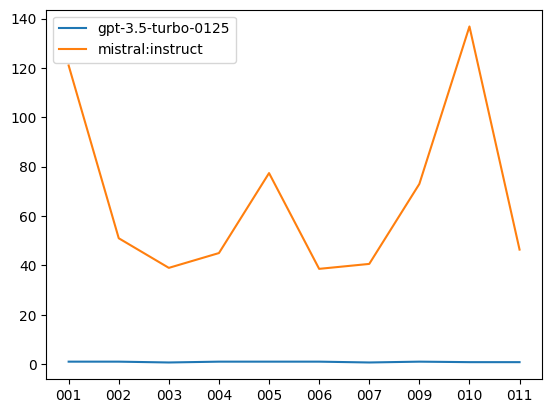

In [45]:
# "extra_information_num_words"
sorted_questions = sorted(questions)
extra_information_num_words_x = [question_name.split('_')[1] for question_name in sorted_questions]
extra_information_num_words_y = []

for model in models:
    extra_information_num_words_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extra_information_num_words = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['extra_information_num_words']:
                            extra_information_num_words += results['tries'][retry]['extra_information_num_words']
                            
                    extra_information_num_words_y.append(extra_information_num_words/len(results['tries']))
                    
                    break
                  
    plt.plot(extra_information_num_words_x, extra_information_num_words_y, label=model)
    plt.legend()

## Infer



### How many successful compilations were there?


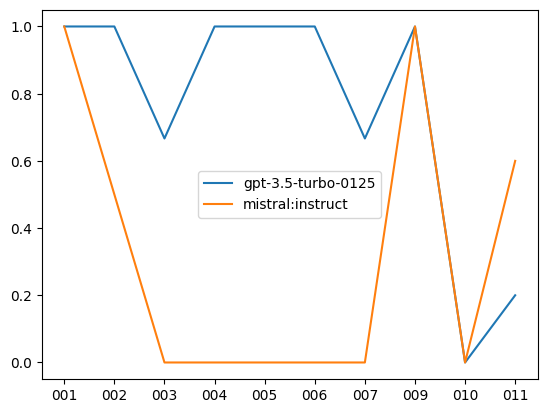

In [46]:
# "number_of_issues" is not None
sorted_questions = sorted(questions)
number_of_issues_x = [question_name.split('_')[1] for question_name in sorted_questions]
number_of_issues_y = []

for model in models:
    number_of_issues_y = []
    sorted_questions = sorted(questions)

    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    compilation_succeeded = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['number_of_issues'] is not None:
                            compilation_succeeded += 1
                            
                    number_of_issues_y.append(compilation_succeeded/len(results['tries']))
                  
    plt.plot(number_of_issues_x, number_of_issues_y, label=model)
    plt.legend()



### What were the issues?





## Tests




### How many tests were there?


In [47]:
# No need



### How many tests passed?


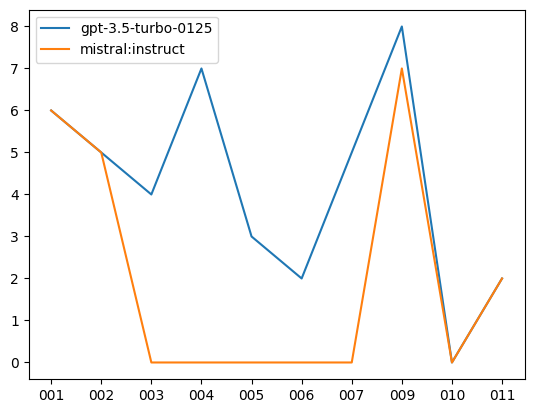

In [48]:
# "num_successes" is not None 
sorted_questions = sorted(questions)

num_successes_x = [question_name.split('_')[1] for question_name in sorted_questions]
num_successes_y = []

for model in models:
    num_successes_y = []
    for question in sorted_questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    best_num_successes = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['num_successes'] is not None:
                            if results['tries'][retry]['num_successes'] > best_num_successes:
                                best_num_successes = results['tries'][retry]['num_successes']
                    
                    num_successes_y.append(best_num_successes)
                    
                
                  
    plt.plot(num_successes_x, num_successes_y, label=model)
    plt.legend()